In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('data_unsupervised.csv')

In [3]:
df


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,False,False,False,False,False,False
4239,False,False,False,False,False,False
4240,False,False,False,False,False,False
4241,False,False,False,False,False,False
4242,False,False,False,False,False,False
...,...,...,...,...,...,...
16435,False,False,False,False,False,False
16436,False,False,False,False,False,False
16437,False,False,False,False,False,False
16438,False,False,False,False,False,False


In [6]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


# Transform data

In [7]:
scaler=StandardScaler()

In [8]:
df[['RHOB_t','GR_t','DEPTH_MD_t','NPHI_t','PEF_t','DTC_t']]=scaler.fit_transform(df[['RHOB','GR','DEPTH_MD','NPHI','PEF','DTC']])

In [9]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_t,GR_t,DEPTH_MD_t,NPHI_t,PEF_t,DTC_t
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690


# Cluster 2_var

In [10]:
#identify optimum number of cluster 

def optimise_k_means (data, max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=max_k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # generate elbow plot
    fig= plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertias')
    plt.grid(True)
    plt.show()

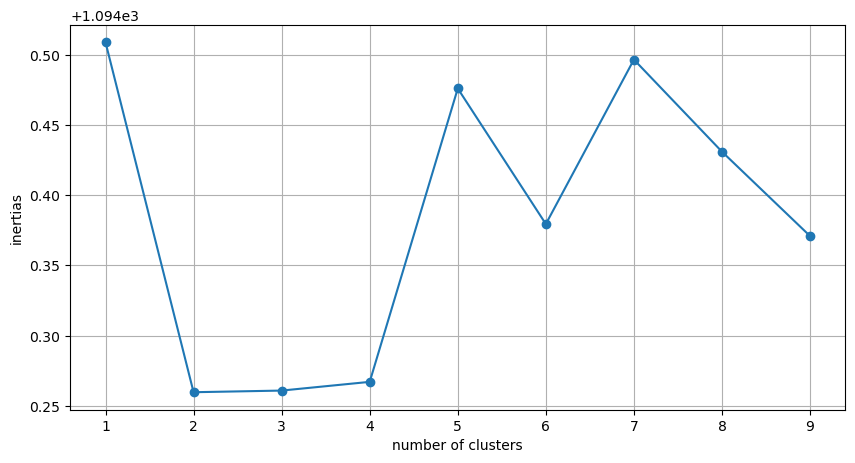

In [11]:
optimise_k_means(df[['RHOB_t','NPHI_t']],10)

# Apply Kmeans clustering

In [12]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df[['RHOB_t','NPHI_t']])

KMeans(n_clusters=3)

In [13]:
df['kmeans_3']=kmeans.labels_

In [14]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_t,GR_t,DEPTH_MD_t,NPHI_t,PEF_t,DTC_t,kmeans_3
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,1
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,1
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,1
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,1


# See Resault

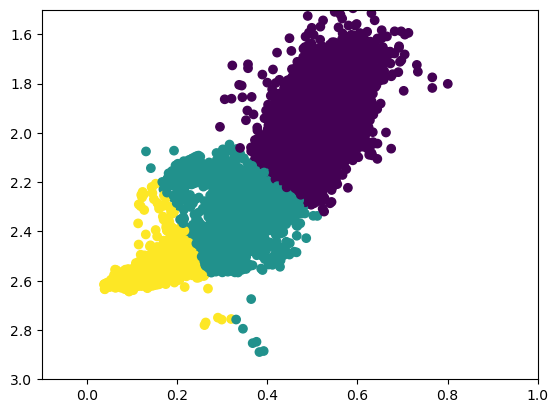

In [15]:
plt.scatter(x=df['NPHI'],y=df['RHOB'],c=df['kmeans_3'])
plt.xlim(-0.1,1)
plt.ylim(3,1.5)
plt.show()

# MULTUI CLUSTER

In [16]:
for k in range(1,6):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(df[['RHOB_t','NPHI_t']])
        df['kmeans_{k}']=kmeans.labels_

In [19]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_t,GR_t,DEPTH_MD_t,NPHI_t,PEF_t,DTC_t,kmeans_3,kmeans_{k}
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,0,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,0,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,0,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,0,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,1,1
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,1,1
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,1,1
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,1,1


KeyError: 'kmeans_{i}'

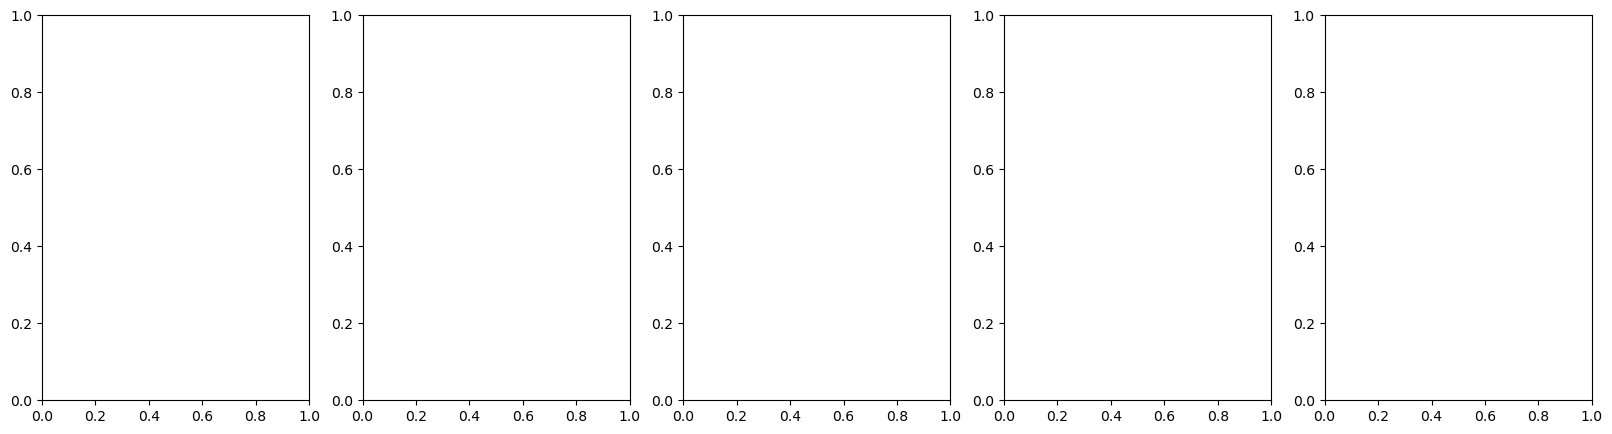

In [24]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i,ax in enumerate (fig.axes,start=1):
    ax.scatter( x=df['NPHI'], y=df['RHOB'],c=df['kmeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1)
    ax.set_tittle(f'n_clusters : {i}')

# ----------------------------------------------------------------------------------------------------------

# Creating kmeans Model 

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# Step 2: Generate Sample Data
# You can create synthetic data for testing purposes using make_blobs:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
#Step 3: Visualize the Data
#Before clustering, it’s helpful to visualize the data:
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Sample Data')
plt.show()

In [ ]:
#Step 4: Initialize and Fit K-Means Model
#Choose the number of clusters (k) and fit the K-Means model:
# Set number of clusters
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
# Step 5: Visualize the Clusters
# Plot the clustered data along with the cluster centers:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clusters')
plt.show()

In [ ]:
# Step 6: Evaluate the Model
# You can evaluate the clustering using metrics like the silhouette score:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f'Silhouette Score: {score:.2f}')

In [ ]:
# Step 7: Choosing the Right K
# To determine the optimal number of clusters, you can use the Elbow method:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()